### **1. Análisis Exploratorio de Datos (EDA)**

EDA, es una etapa crucial en la cual se busca comprender la estructura y descubrir patrones en los datos, así como las relaciones entre variables.

En este caso, voy a explorar el conjunto de datos llamado ML_cars.csv. 

Durante esta fase, utilizare diferentes visualizaciones y técnicas para identificar tendencias y extraer información valiosa.

#### **Importar librerías.**

In [1]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código.
import inflection #Librería para convertir entre distintos estilos de nombres de variables
import re  # La biblioteca re en Python se utiliza para trabajar con expresiones regulares, herramientas poderosas para buscar y manipular cadenas de texto.
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode #Biblioteca de Python para matemáticas, ciencia e ingeniería
from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python
from collections import Counter #Es una clase que facilita el conteo de elementos en una colección

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### **Cargar y visializar los datos.**

In [2]:
cars = pd.read_csv('./ML_cars.csv')  # Carga los datos
print("* Los datos fueron cargados correctamente.")
print("- - " * 11)
# Muestra los primeros 5 registros del dataframe
print("* Primeros 5 registros del dataset:")
cars.head()

* Los datos fueron cargados correctamente.
- - - - - - - - - - - - - - - - - - - - - - 
* Primeros 5 registros del dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Muestra el tamaño del dataset
print(f"* El dataset tiene {cars.shape[0]} filas y {cars.shape[1]} columnas.")

* El dataset tiene 205 filas y 26 columnas.


**Descripción de las Variables**

A continuación, presento el diccionario de datos que detalla los nombres de las variables y proporciona una breve descripción de cada una. Este diccionario me permitirá comprender mejor los datos con los que estaré trabajando.

![DiccionarioDatos](https://github.com/jdeiloff/Proyecto-Integrador-M6/raw/main/dic_pi2.jpg)


**Análisis Descriptivo**

Ahora que he cargado correctamente los datos, procedo a realizar una exploración inicial para entender mejor su estructura y evaluar la calidad de la información. Para ello, llevaré a cabo los siguientes pasos:

- Tipos de datos: Verificaré los tipos de cada columna, identificando cuáles son numéricas y cuáles categóricas.
- Valores faltantes o nulos: Identificaré si existen datos nulos en alguna columna y calcularé la proporción de valores faltantes utilizando isnull().sum().
-  Filas duplicadas: Verificaré  que no hayan, ya que pueden introducir sesgos o distorsionar los resultados de los modelos predictivos si no se manejan adecuadamente.
- Estadísticas descriptivas: Calcularé estadísticas básicas para las variables numéricas, como la media, mediana, desviación estándar, entre otras, utilizando el método describe().
- Distribución de variables categóricas: Analizaré la distribución de las variables categóricas utilizando value_counts() para identificar cómo se distribuyen los valores en cada categoría.

Este enfoque me permitirá tener una visión general del estado de los datos y será la base para las siguientes etapas del análisis.

**Tipos de datos**

In [4]:
# Obtener los tipos de datos de cada columna en el DataFrame
column_types = cars.dtypes
print(f"* Número de variables: {len(column_types)}")
print("- - " * 35)

# Inicializar contadores
discrete_count = 0
continuous_count = 0
categorical_count = 0

# Inicializar listas para almacenar nombres de columnas
discrete_columns = []
continuous_columns = []
categorical_columns = []

# Clasificar las columnas según su tipo de dato
for col, dtype in column_types.items():
    if np.issubdtype(dtype, np.integer):
        discrete_count += 1
        discrete_columns.append(col)
    elif np.issubdtype(dtype, np.floating):
        continuous_count += 1
        continuous_columns.append(col)
    elif np.issubdtype(dtype, 'object') or pd.api.types.is_categorical_dtype(dtype):
        categorical_count += 1
        categorical_columns.append(col)

# Imprimir resultados
print(f"* DISCRETAS:\n  * Número de variables: {discrete_count} \n  * Variables: [{', '.join(discrete_columns)}]")  
print("- - " * 35)

print(f"* CONTINUAS:\n  * Número de variables: {continuous_count} \n  * Variables: [{', '.join(continuous_columns)}]")  
print("- - " * 35)

print(f"* CATEGÓRICAS:\n  * Número de variables: {categorical_count} \n  * Variables: [{', '.join(categorical_columns)}]")  
print("- - " * 35)

* Número de variables: 26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* DISCRETAS:
  * Número de variables: 8 
  * Variables: [car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CONTINUAS:
  * Número de variables: 8 
  * Variables: [wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio, price]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CATEGÓRICAS:
  * Número de variables: 10 
  * Variables: [CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

**Valores faltantes o nulos**

In [5]:
# Verificar valores faltantes (valores nulos)
print("* Valores faltantes o nulos en cada columna son:")
print("- " * 25)
print(cars.isnull().sum())

* Valores faltantes o nulos en cada columna son:
- - - - - - - - - - - - - - - - - - - - - - - - - 
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


**Filas duplicadas**

In [6]:
# Verificar si hay filas duplicadas
duplicate_rows = cars[cars.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"* Filas duplicadas son: {num_duplicate_rows}")

* Filas duplicadas son: 0


**Estadísticas descriptivas**

In [7]:
# Resumen de estadística descriptiva
print("* El Resumen de estadística descriptiva es:")
print("- " * 22)
cars['price'].describe()

* El Resumen de estadística descriptiva es:
- - - - - - - - - - - - - - - - - - - - - - 


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**Distribución de variables categóricas**

In [8]:
# Lista de las variables categóricas
categorical_vars = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Crear un DataFrame vacío para almacenar los resultados
distribution_table = pd.DataFrame(columns=['Variable', 'Categoría', 'Frecuencia'])

# Para cada variable categórica, obtener sus conteos de frecuencia
for var in categorical_vars:
    # Obtener los conteos de cada categoría
    value_counts = cars[var].value_counts()
    # Crear un DataFrame temporal para almacenar los resultados
    temp_df = pd.DataFrame({'Variable': var, 'Categoría': value_counts.index, 'Frecuencia': value_counts.values})
    # Agregar los resultados a la tabla final
    distribution_table = pd.concat([distribution_table, temp_df], ignore_index=True)

# Mostrar la tabla
print("* La distribución de variables categoricas es:")
print("- " * 25)
distribution_table

* La distribución de variables categoricas es:
- - - - - - - - - - - - - - - - - - - - - - - - - 


,Variable,Categoría,Frecuencia
0,CarName,toyota corona,6
1,CarName,toyota corolla,6
2,CarName,peugeot 504,6
3,CarName,subaru dl,4
4,CarName,mitsubishi mirage g4,3
...,...,...,...
180,fuelsystem,1bbl,11
181,fuelsystem,spdi,9
182,fuelsystem,4bbl,3
183,fuelsystem,mfi,1


##### Después de cargar los datos, realicé un análisis exploratorio para entender mejor su estructura. Verifiqué los tipos de datos, identificando variables numéricas y categóricas, y confirmé que no hay valores nulos ni filas duplicadas. También calculé estadísticas descriptivas para las variables numéricas: el precio promedio de los vehículos es de 13,276 USD, con un rango de 5,118 a 45,400 USD. Analicé la distribución de las variables categóricas, encontrando 185 combinaciones únicas, lo que me ayudará a prepararlas para el modelado. Este análisis me permite tener una visión clara de los datos antes de pasar a la siguiente etapa del proyecto.

#### **Distribución de las Variables Numéricas**

Para explorar las distribuciones de las variables numéricas del conjunto de datos, realizaré dos tipos de visualizaciones: histogramas y diagramas de caja (boxplots). Estos gráficos nos permiten identificar patrones importantes en las distribuciones, como la presencia de sesgos, concentraciones de valores, y posibles valores atípicos.
- **Histogramas**: Graficar histogramas de las variables numéricas como el precio, potencia, cilindrada, etc., para entender su distribución.
- **Boxplots**: Visualizar las distribuciones numéricas usando boxplots para identificar posibles valores atípicos.

**Histogramas**

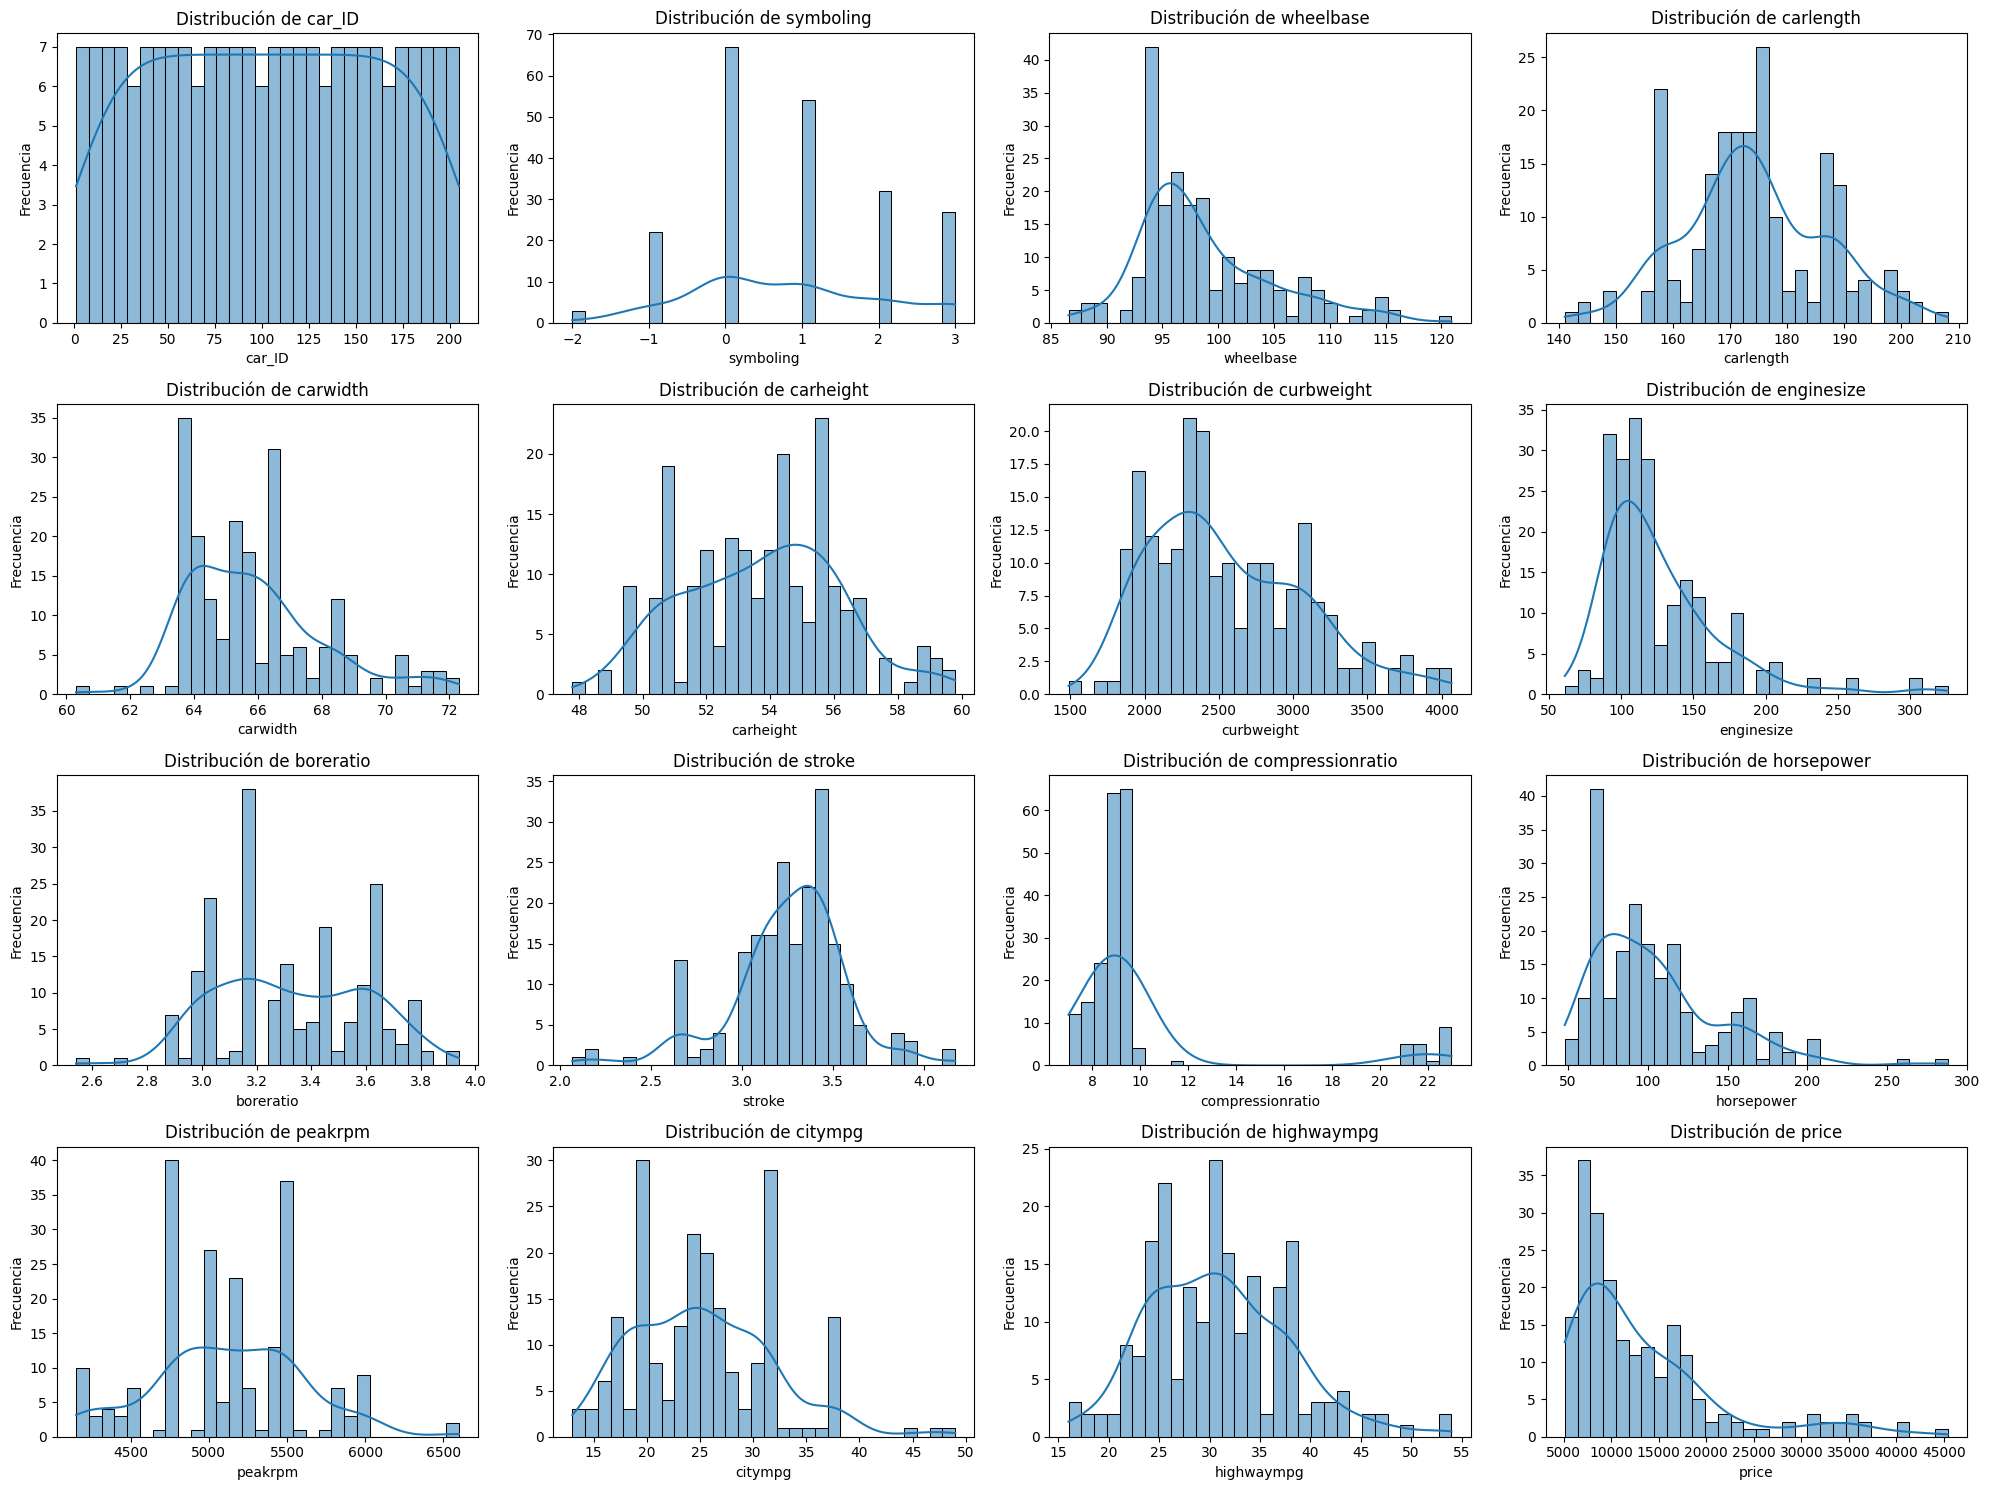

In [9]:
# Seleccionar columnas continuas
continuous_columns = cars.select_dtypes(include=[np.float64, np.int64]).columns

# Crear una figura con 4 filas y 4 columnas
plt.figure(figsize=(20, 15))  # Ajusta el tamaño según sea necesario

for i, col in enumerate(continuous_columns):
    plt.subplot(4, 4, i + 1)  # Crea un subplot en la posición i+1
    sns.histplot(cars[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

**Boxplots**

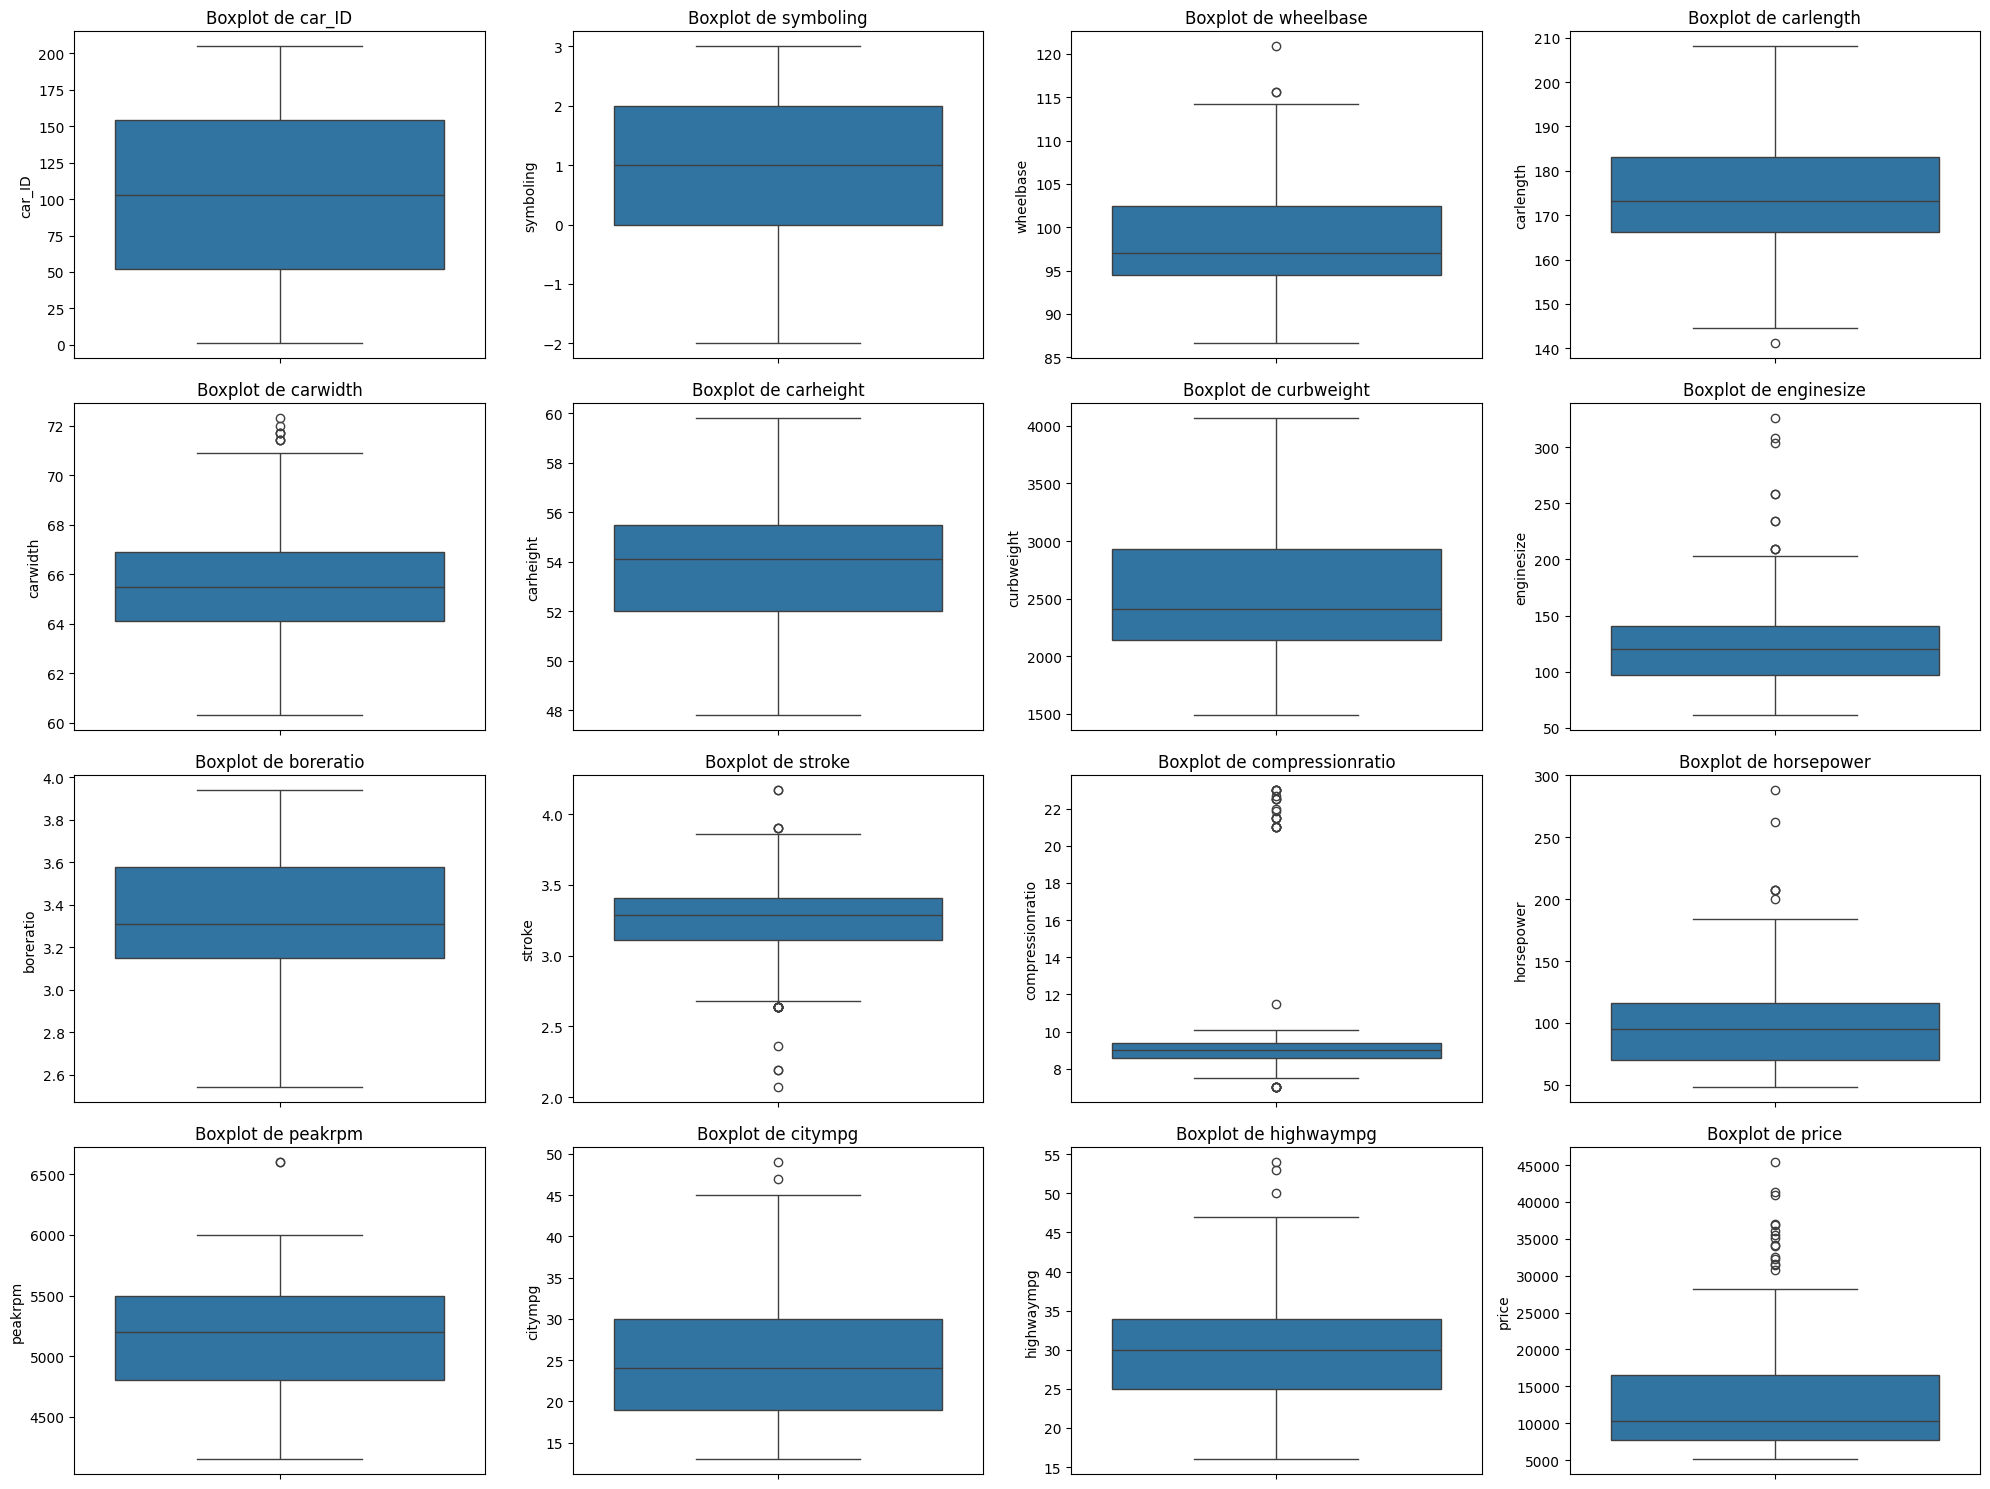

In [10]:
# Seleccionar columnas continuas
continuous_columns = cars.select_dtypes(include=[np.float64, np.int64]).columns

# Crear una figura con 4 filas y 4 columnas (ajustar filas y columnas según el número de variables)
plt.figure(figsize=(20, 15))  # Ajusta el tamaño según sea necesario

for i, col in enumerate(continuous_columns):
    plt.subplot(4, 4, i + 1)  # Crea un subplot en la posición i+1
    sns.boxplot(y=cars[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

En los **histogramas**, se puede observar la distribución de las variables continuas. Algunas como wheelbase, carlength y curbweight muestran distribuciones cercanas a lo normal, mientras que otras como enginesize, compressionratio y price presentan una asimetría pronunciada, lo que sugiere la presencia de valores atípicos.

En los **boxplots**, se identifican los valores atípicos (outliers) en varias variables, como en wheelbase, enginesize, compressionratio y price. Estos valores extremos podrían influir en los resultados de los modelos predictivos y podrían requerir tratamiento adicional. Por otro lado, algunas variables como carwidth y carheight tienen distribuciones más compactas sin outliers evidentes.

**Relaciones entre Variables**
- **Matriz de correlación**: Crear una matriz de correlación entre las variables numéricas (corr()) y visualizarla con un heatmap. Esto te permitirá ver qué características tienen una relación más fuerte con el precio.
- **Scatterplots**: Crear gráficos de dispersión (scatterplots) para ver la relación entre el precio y otras variables numéricas, como la potencia o el año.

**Matriz de correlación**

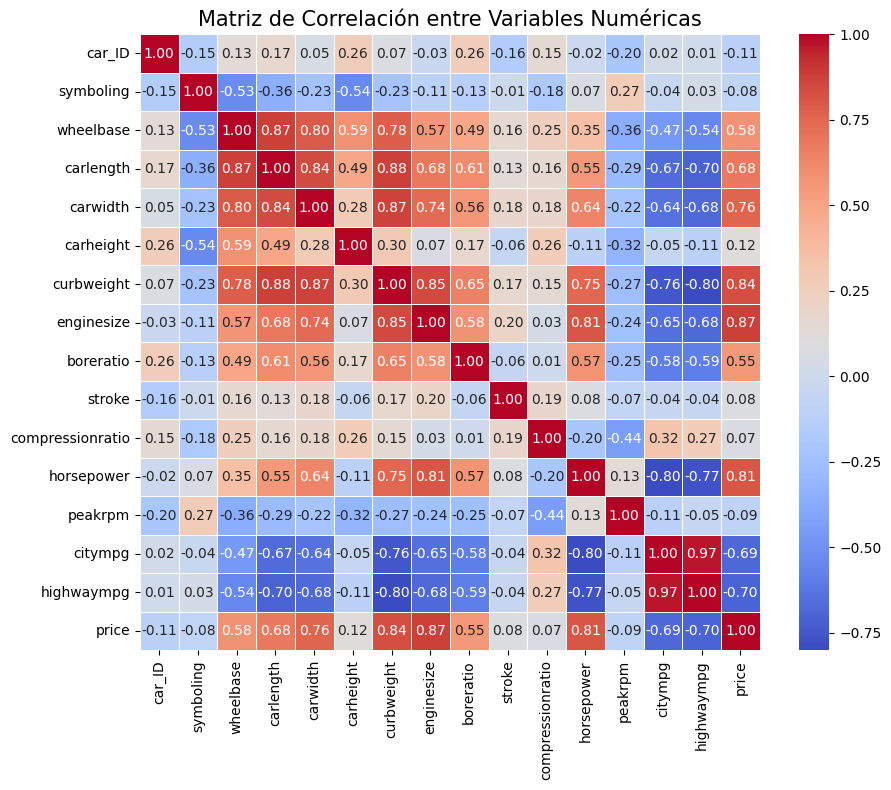

In [11]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include=[np.number])

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Añadir título
plt.title('Matriz de Correlación entre Variables Numéricas', size=15)

# Mostrar el gráfico
plt.show()

**Scatterplots**

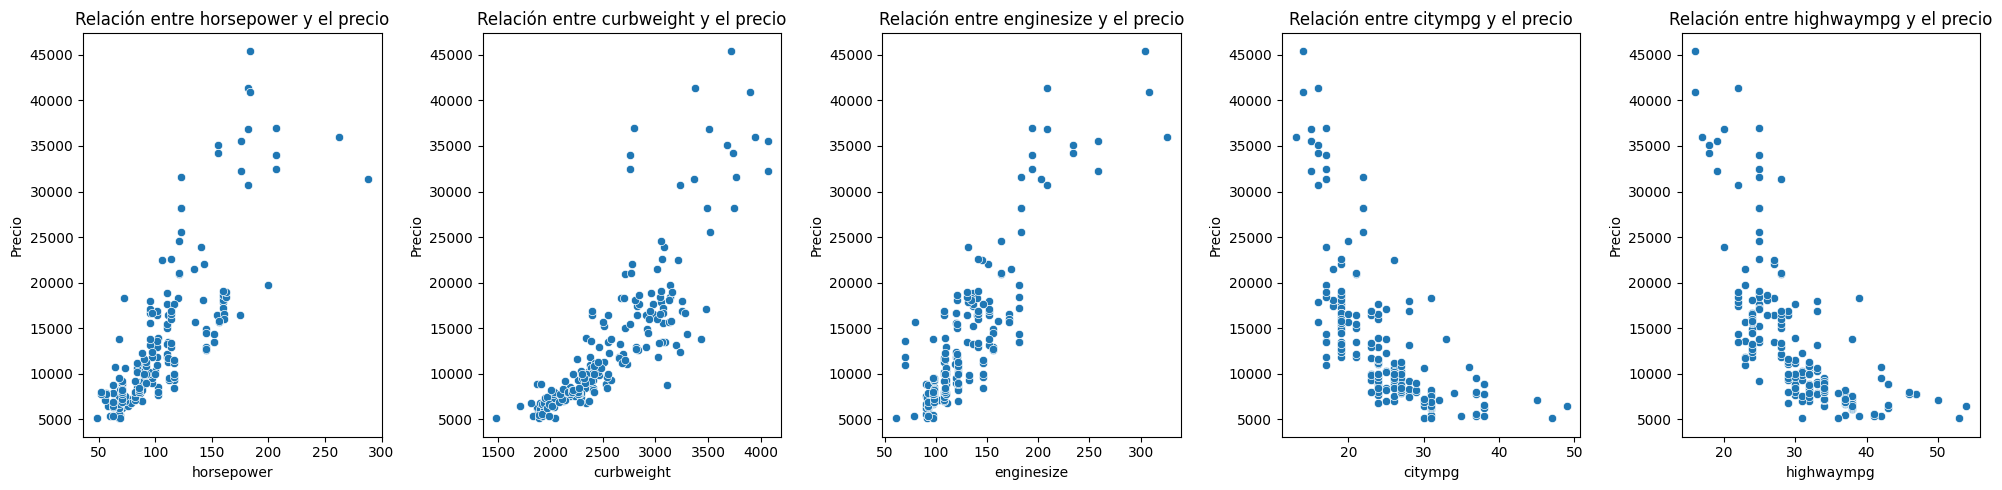

In [12]:
# Definir las variables a comparar con el precio
variables_to_compare = ['horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']  # Agrega o cambia las variables aquí

# Crear una figura con una fila
plt.figure(figsize=(20, 5))  # Tamaño de la figura, ancho mayor para que se vean mejor

# Crear un gráfico de dispersión para cada variable numérica respecto al precio
for i, var in enumerate(variables_to_compare):
    plt.subplot(1, len(variables_to_compare), i + 1)  # Crear un subplot en una sola fila
    sns.scatterplot(x=cars[var], y=cars['price'])  # Gráfico de dispersión
    plt.title(f'Relación entre {var} y el precio')
    plt.xlabel(var)
    plt.ylabel('Precio')

plt.tight_layout()  # Ajustar el espacio entre los subplots
plt.show()

Realicé un análisis de correlación entre las variables numéricas y el precio de los automóviles. Observé que variables como el peso del vehículo, el tamaño del motor y la potencia están fuertemente correlacionadas de manera positiva con el precio, mientras que el consumo de combustible tiene una relación negativa. Luego, visualicé estas relaciones mediante gráficos de dispersión, confirmando que los autos más grandes y potentes tienden a ser más caros, y los más eficientes en combustible suelen ser más económicos. Estos hallazgos serán clave para la construcción de los modelos predictivos.

**Análisis de Variables Categóricas**
- **Gráficos de barras**: Visualizar la distribución de variables categóricas (tipo de combustible, carrocería, etc.) usando gráficos de barras.
- **Boxplots por categoría**: Comparar el precio según las categorías importantes como el tipo de combustible, carrocería, y más.

**Gráficos de barras**

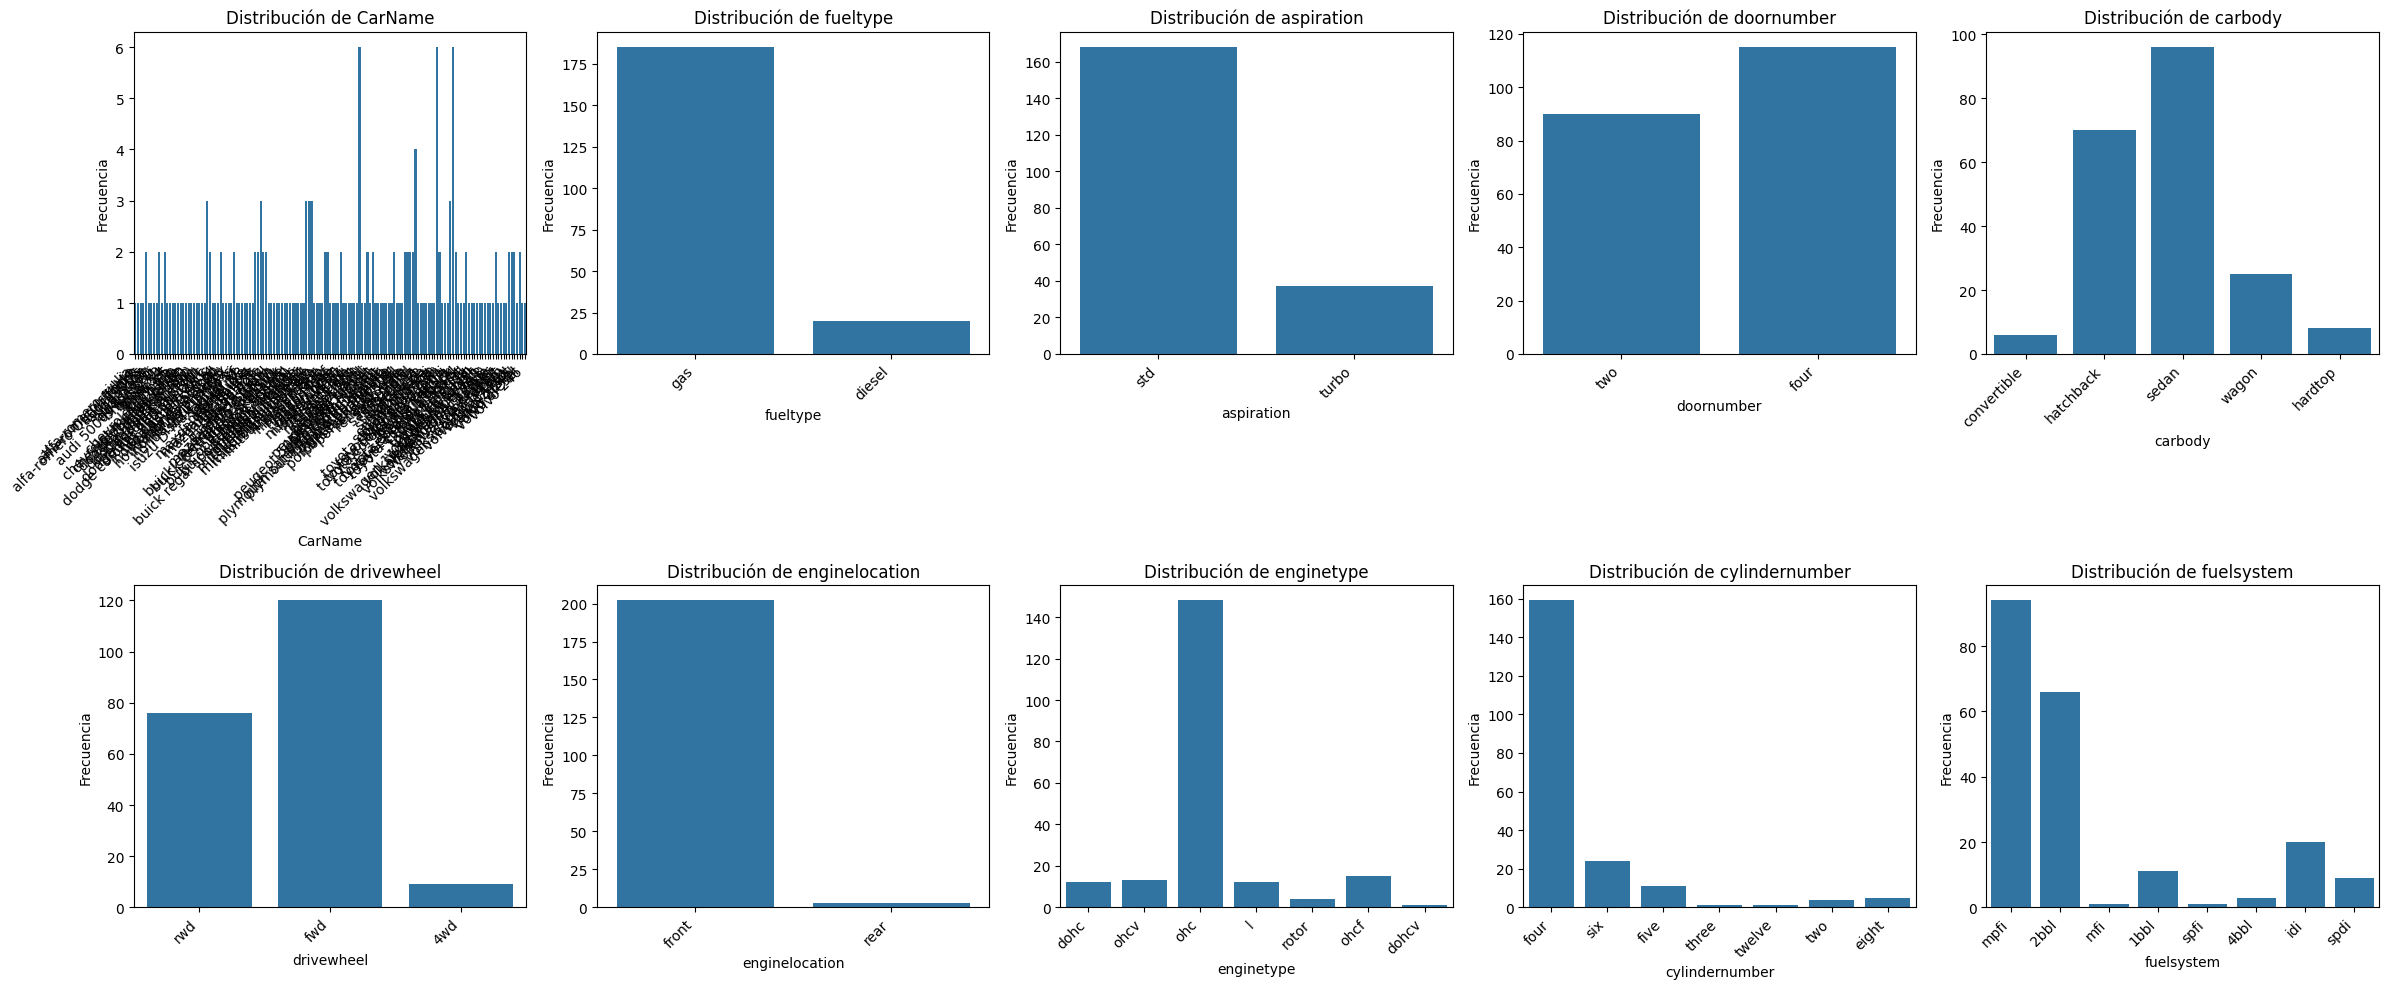

In [13]:
# Seleccionar columnas categóricas
categorical_columns = cars.select_dtypes(include=['object', 'category']).columns

# Crear una figura con 5 columnas y 2 filas (para mostrar los 10 gráficos)
plt.figure(figsize=(24, 10))  # Ajusta el tamaño de la figura

# Bucle para generar 10 subplots (5x2)
for i, col in enumerate(categorical_columns[:10]):  # Limitar a las primeras 10 columnas
    plt.subplot(2, 5, i + 1)  # 2 filas y 5 columnas
    sns.countplot(data=cars, x=col)  # Countplot para variables categóricas, eliminamos `palette`
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados y alinearlas a la derecha

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

**Boxplots por categoría**

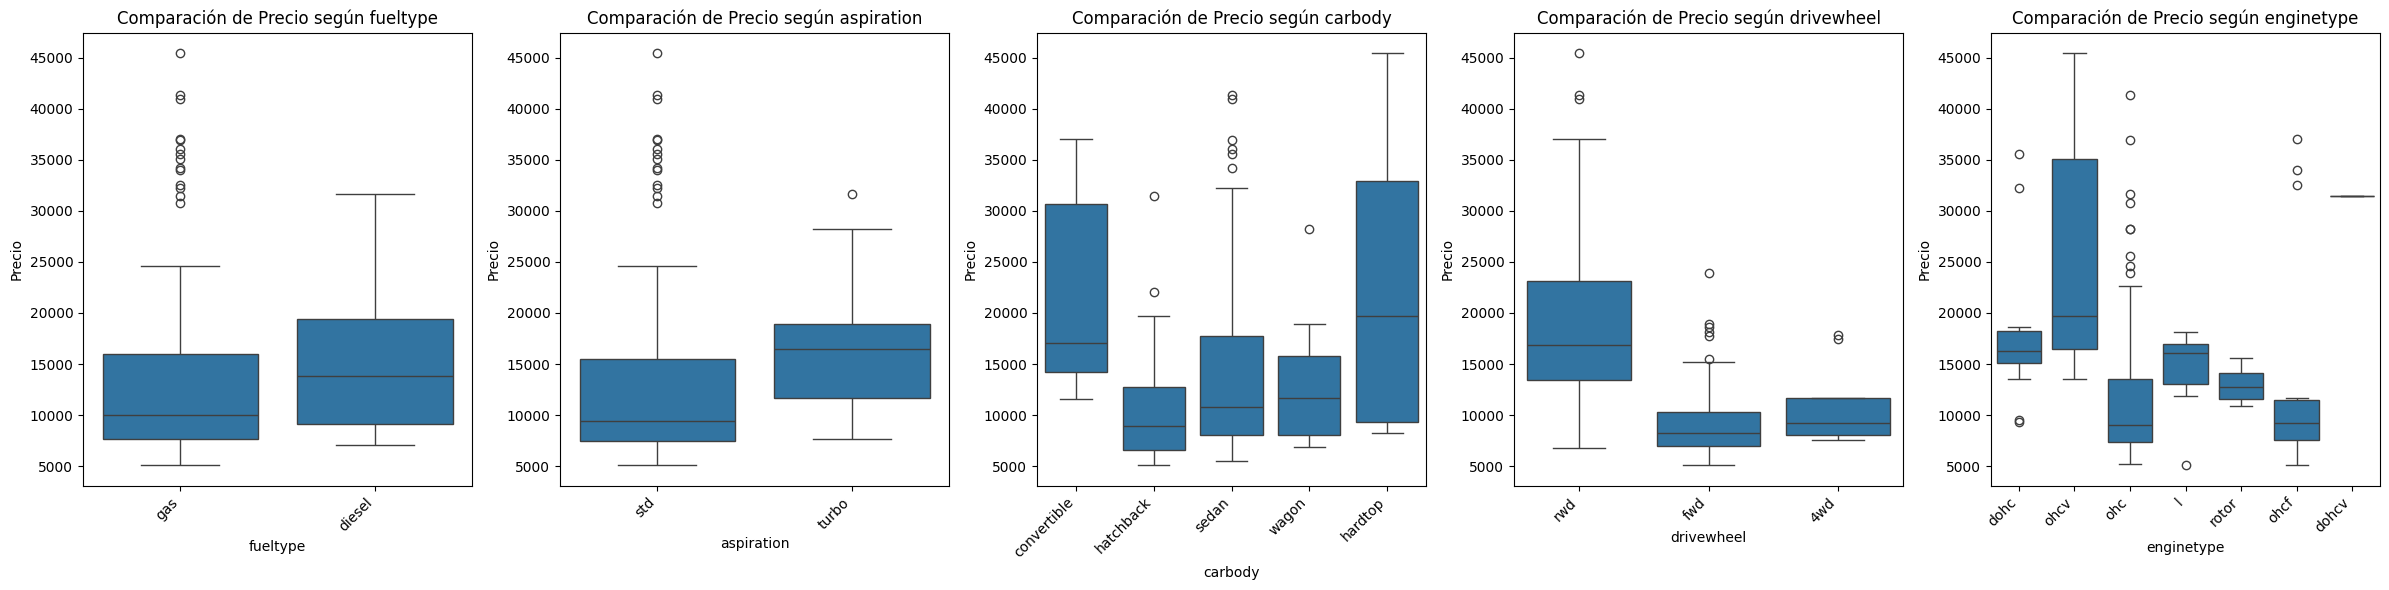

In [14]:
# Crear una figura con 5 columnas y 1 fila
plt.figure(figsize=(24, 6))  # Ajustar el tamaño de la figura

# Lista de variables categóricas importantes para comparar con el precio
categorical_columns_for_boxplot = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype']

# Bucle para generar subplots de Boxplots
for i, col in enumerate(categorical_columns_for_boxplot):
    plt.subplot(1, 5, i + 1)  # 1 fila y 5 columnas
    sns.boxplot(data=cars, x=col, y='price')  # Boxplot con la variable categórica y el precio
    plt.title(f'Comparación de Precio según {col}')
    plt.xlabel(col)
    plt.ylabel('Precio')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados y alinearlas a la derecha

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

En el análisis exploratorio de datos, he realizado una visualización exhaustiva de las variables categóricas y su relación con el precio de los automóviles. Utilicé gráficos de countplot para representar la distribución de las principales categorías como el tipo de combustible, el número de puertas y el tipo de carrocería. Estos gráficos revelaron patrones interesantes: la mayoría de los vehículos utilizan gasolina, y los sedanes son la carrocería más común en el conjunto de datos.

Posteriormente, implementé boxplots para comparar el precio de los automóviles en función de diferentes categorías. Los boxplots mostraron que los vehículos diésel tienden a tener precios más altos en comparación con los que utilizan gasolina. Además, observé que los automóviles con carrocería de tipo convertible y sedán presentan una gran variabilidad en sus precios, lo que sugiere que existen modelos de alto precio en esas categorías.

**Análisis de Outliers**
- **Identificación de outliers**: Detectar posibles valores atípicos en las variables numéricas clave (por ejemplo, el precio o la potencia) mediante boxplots y otras técnicas.
- **Decisiones sobre outliers**: Anotar si se va a tomar alguna acción sobre los outliers (removerlos o tratarlos).

**Identificación de outliers**

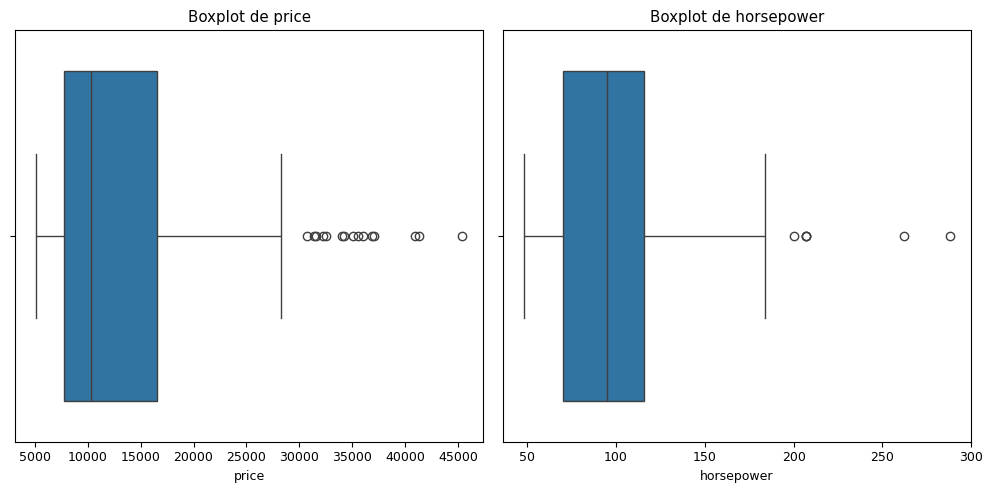

In [15]:
# Ajustar el tamaño de la fuente para los títulos, etiquetas y otros textos
plt.rcParams.update({'font.size': 9})  # Tamaño general de la fuente

# Lista de variables numéricas clave para el análisis (ejemplo: precio y potencia)
key_numeric_columns = ['price', 'horsepower']  # Puedes agregar más columnas si es necesario

# Crear boxplots para cada variable numérica clave
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la figura

for i, col in enumerate(key_numeric_columns, 1):
    plt.subplot(1, len(key_numeric_columns), i)  # Crear subplots
    sns.boxplot(x=cars[col])  # Boxplot para cada columna
    plt.title(f'Boxplot de {col}')  # Título con el nombre de la columna

plt.tight_layout()  # Ajustar el diseño de la figura
plt.show()

**Decisiones sobre outliers**

Observando los **boxplots** de las variables **precio** y **potencia**, se puede notar la presencia de varios **outliers** en ambos casos:
- En el boxplot del **precio**, la mayoría de los vehículos se encuentran en un rango entre aproximadamente **$5000 y $20000**, pero se observan valores atípicos que superan los **$25000**, e incluso alcanzan hasta los **$45000**. Estos outliers pueden corresponder a vehículos de lujo o de alta gama, por lo que es importante analizar si los mantendré o no en el análisis final, dependiendo de su impacto en el modelo.
- En el caso de la **potencia**, la mayoría de los vehículos tienen entre **50 y 150 caballos de fuerza**, pero hay varios puntos atípicos que superan los **200 caballos**, lo cual es poco común. Es posible que estos vehículos representen modelos deportivos o de alto rendimiento. También tendré que decidir si estos outliers distorsionan los resultados o si aportan información relevante al modelo.

En ambos gráficos, los valores atípicos merecen atención especial, ya que podrían afectar las predicciones si no son tratados adecuadamente. Decidiré si elimino estos outliers o si los transformo en variables para mitigar su impacto en el modelo final.

**Conclusiones del Análisis Exploratorio de Datos (EDA)**

**Resumen de hallazgos**: Durante el EDA, se han observado varias distribuciones y relaciones interesantes en el conjunto de datos:

**Distribuciones**:
- **Precio**: La distribución del precio presenta una asimetría, con una concentración significativa de vehículos en el rango inferior de precios (alrededor de $5000 a $15000). Existen algunos outliers en el extremo superior, lo que sugiere que hay vehículos de lujo que podrían influir en los resultados del análisis.
- **Potencia**: La potencia de los vehículos también muestra una distribución sesgada, con la mayoría de los vehículos situados entre 50 y 150 caballos de fuerza. Nuevamente, se identificaron valores atípicos en la parte superior, lo que podría indicar la presencia de modelos de alto rendimiento.

**Relaciones**:
- Al analizar las comparaciones de precios según diferentes variables categóricas como tipo de combustible, tipo de carrocería y número de puertas, se encontró que ciertas categorías, como los vehículos convertibles y con motor de tipo dohc, tienden a tener precios más altos en comparación con otros.
- La variable aspiración mostró que los vehículos con motores turbo son más caros que aquellos con motores estándar, lo que indica una relación entre la complejidad del motor y el precio del vehículo.

**Patrones**:
- La variable tipo de combustible mostró una clara predominancia del gas frente al diésel, lo que puede influir en el tipo de clientes y sus preferencias.
- Las variables relacionadas con la ubicación del motor y el número de puertas también tienen efectos notables sobre los precios, lo que puede ser importante para la segmentación de mercado.

**Ideas para el modelado**:
Con base en los hallazgos del EDA, se identifican las siguientes variables como potencialmente más relevantes para los modelos de predicción:

- **Precio**: La variable objetivo para el modelo de regresión.
- **Potencia**: Una variable clave que puede influir significativamente en el precio de los vehículos.
- **Tipo de combustible**: Esta variable puede ayudar a segmentar los vehículos en categorías con diferentes precios.
- **Tipo de carrocería**: Puede tener un impacto importante en el precio debido a las diferencias en estilo y funcionalidad.
- **Número de puertas y ubicación del motor**: Estas variables podrían tener correlaciones con el precio y deberían considerarse en el modelo.

Este **EDA** proporciona una base sólida para la próxima fase de Preparación de Datos y Modelado, ya que he podido identificar patrones, valores faltantes, outliers y las relaciones entre las variables que influirán en la construcción de los modelos predictivos.